<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/main/notebooks/division_approach/4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 - Clustering process and validation



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h1_ma.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h2_ma.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h3_ma.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h4_ma.csv"

numerical_features = ['LIT_HC', 'LIT_HP', 'N_ETB',
'N_UFS', 'PN_MEDICAL', 'POPULATION',
'P_MEDICAL', 'QUANTITY', 'QUANTITY_MA',
'SEJ_HAD', 'SEJ_MCO', 'SEJ_PSY',
'SEJ_SLD', 'SEJ_SSR', 'HOSPI_CODE_UCD_NUM']

df_h1 = pd.read_csv(df_h1_url)
df_h2 = pd.read_csv(df_h2_url)
df_h3 = pd.read_csv(df_h3_url)
df_h4 = pd.read_csv(df_h4_url)

In [ ]:
features_h1 = list(set(numerical_features) - {"N_ETB", "SEJ_HAD", "SEJ_PSY"})
features_h2 = list(set(numerical_features) - {'SEJ_HAD', 'SEJ_SLD', 'N_ETB'})
features_h3 = list(set(numerical_features) - {'N_ETB'})
features_h4 = list(set(numerical_features) - {'SEJ_HAD', 'N_ETB'})

In [ ]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOSPI_CODE_UCD      1208 non-null   int64  
 1   LIT_HC              1208 non-null   float64
 2   LIT_HP              1208 non-null   float64
 3   N_UFS               1208 non-null   float64
 4   PN_MEDICAL          1208 non-null   float64
 5   POPULATION          1208 non-null   float64
 6   P_MEDICAL           1208 non-null   float64
 7   QUANTITY            1208 non-null   float64
 8   QUANTITY_MA         1208 non-null   float64
 9   SEJ_MCO             1208 non-null   float64
 10  SEJ_SLD             1208 non-null   float64
 11  SEJ_SSR             1208 non-null   float64
 12  YEAR                1208 non-null   float64
 13  MONTH_1.0           1208 non-null   int64  
 14  MONTH_2.0           1208 non-null   int64  
 15  MONTH_3.0           1208 non-null   int64  
 16  MONTH_

In [ ]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     697 non-null    int64  
 1   LIT_HC             697 non-null    float64
 2   LIT_HP             697 non-null    float64
 3   N_UFS              697 non-null    float64
 4   PN_MEDICAL         697 non-null    float64
 5   POPULATION         697 non-null    float64
 6   P_MEDICAL          697 non-null    float64
 7   QUANTITY           697 non-null    float64
 8   QUANTITY_MA        697 non-null    float64
 9   SEJ_MCO            697 non-null    float64
 10  SEJ_PSY            697 non-null    float64
 11  SEJ_SSR            697 non-null    float64
 12  YEAR               697 non-null    float64
 13  MONTH_1.0          697 non-null    int64  
 14  MONTH_2.0          697 non-null    int64  
 15  MONTH_3.0          697 non-null    int64  
 16  MONTH_4.0          697 non

In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     1397 non-null   int64  
 1   LIT_HC             1397 non-null   float64
 2   LIT_HP             1397 non-null   float64
 3   N_UFS              1397 non-null   float64
 4   PN_MEDICAL         1397 non-null   float64
 5   POPULATION         1397 non-null   float64
 6   P_MEDICAL          1397 non-null   float64
 7   QUANTITY           1397 non-null   float64
 8   QUANTITY_MA        1397 non-null   float64
 9   SEJ_HAD            1397 non-null   float64
 10  SEJ_MCO            1397 non-null   float64
 11  SEJ_PSY            1397 non-null   float64
 12  SEJ_SLD            1397 non-null   float64
 13  SEJ_SSR            1397 non-null   float64
 14  YEAR               1397 non-null   float64
 15  MONTH_1.0          1397 non-null   int64  
 16  MONTH_2.0          1397 

In [ ]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     770 non-null    int64  
 1   LIT_HC             770 non-null    float64
 2   LIT_HP             770 non-null    float64
 3   N_UFS              770 non-null    float64
 4   PN_MEDICAL         770 non-null    float64
 5   POPULATION         770 non-null    float64
 6   P_MEDICAL          770 non-null    float64
 7   QUANTITY           770 non-null    float64
 8   QUANTITY_MA        770 non-null    float64
 9   SEJ_MCO            770 non-null    float64
 10  SEJ_PSY            770 non-null    float64
 11  SEJ_SLD            770 non-null    float64
 12  SEJ_SSR            770 non-null    float64
 13  YEAR               770 non-null    float64
 14  MONTH_1.0          770 non-null    int64  
 15  MONTH_2.0          770 non-null    int64  
 16  MONTH_3.0          770 non

## 4.1 - Train, Test split

In [ ]:
X_h1 = df_h1.drop('HOSPI_CODE_UCD', axis = 1).values
X_h2 = df_h2.drop('HOSPI_CODE_UCD', axis = 1).values
X_h3 = df_h3.drop('HOSPI_CODE_UCD', axis = 1).values
X_h4 = df_h4.drop('HOSPI_CODE_UCD', axis = 1).values

X_h1_train, X_h1_test = train_test_split(X_h1,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

X_h2_train, X_h2_test = train_test_split(X_h2,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

X_h3_train, X_h3_test = train_test_split(X_h3,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

X_h4_train, X_h4_test = train_test_split(X_h4,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

## 4.2 - K-means model with different cluster composition
## &
## 4.3 - Model evaluation

In [ ]:
def kmeans_clustering(X, n_clusters=2):
    model = KMeans(n_clusters=n_clusters,
                   init = 'k-means++',
                   n_init=1,
                   max_iter=10,
                   random_state=42)
    model.fit(X)
    return model

In [ ]:
from sklearn.cluster import MiniBatchKMeans

def minibatch_kmeans_clustering(X, n_clusters=2):
    model = MiniBatchKMeans(n_clusters=n_clusters,
                            init='k-means++',
                            n_init=1,
                            batch_size=10,
                            max_iter=10,
                            random_state=42)
    model.fit(X)
    return model


In [ ]:
def evaluate_kmeans_clustering(X_train, X_test, n_clusters=2, metric='euclidean', verbose = False, algorithm = 'k-means'):

    if algorithm == 'k-means':
      model = kmeans_clustering(X_train, n_clusters)

    elif algorithm == 'mini-batch':
      model = minibatch_kmeans_clustering(X_train, n_clusters)

    y_pred = model.predict(X_test)

    silhouette = metrics.silhouette_score(X_test, y_pred, metric=metric)
    davies_bouldin = metrics.davies_bouldin_score(X_test, y_pred)

    if verbose:
      metrics_string = '#'*10+' Metrics for test split - '+f'{n_clusters} clusters '+'#'*10
      print()
      print('#'*len(metrics_string))
      print(metrics_string)
      print()
      print(f'Silhouette Score: {round(silhouette, 2)}')
      print(f'Davies-Bouldin Score: {round(davies_bouldin, 2)}')
      print()
      print('#'*len(metrics_string))
      print('#'*len(metrics_string))
      print()

    return silhouette, davies_bouldin

In [ ]:
def visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores):

  # Find optimal cluster numbers based on the scores
  s_max = np.argmax(s_scores)+2
  dbs_min = np.argmin(dbs_scores)+2
  calinski_max = np.argmax(calinski_scores)+2

  # Print the best scores and cluster numbers
  string_array = '#'*10 + ' Metrics best performance for different clusters ' + '#'*10
  len_string_array = len(string_array)
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()
  print(string_array)
  print(f'Best score for Silhouette metric: {max(s_scores):.2f} for {s_max} clusters')
  print(f'Best score for Davies Bouldin metric: {min(dbs_scores):.2f} for {dbs_min} clusters')
  print()
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()

  # Plot Silhouette scores
  x = np.arange(min_clusters, max_clusters+1)
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

  # Plot Silhouette scores
  axs[0].stem(x, s_scores, linefmt='C0-', markerfmt='C0o', basefmt=' ')
  axs[0].set_xlabel('Number of Clusters')
  axs[0].set_ylabel('Silhouette Score')
  axs[0].set_title('Silhouette Scores for Different Cluster Numbers')
  axs[0].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[0].set_ylim([0, 1])
  axs[0].grid(True)

  # Plot Davies Bouldin Scores
  axs[1].stem(x, dbs_scores, linefmt='C1-', markerfmt='C1o', basefmt=' ')
  axs[1].set_xlabel('Number of Clusters')
  axs[1].set_ylabel('Davies Bouldin Score')
  axs[1].set_title('Davies Bouldin Scores for Different Cluster Numbers')
  axs[1].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[1].set_ylim([0, 1])
  axs[1].grid(True)

  plt.show()




In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import time

def create_elbow_plot(X, max_clusters=10, sample_fraction=0.1):
    # Sample a subset of the data for faster processing (optional)
    n_samples = int(sample_fraction * len(X))
    X_sample = X[:n_samples]

    # Initialize lists to store inertia and training times
    kmeans_inertia = []
    kmeans_train_time = []
    minibatch_inertia = []
    minibatch_train_time = []

    # Perform K-means clustering for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        # Perform K-means clustering
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters,
                        init = 'k-means++',
                        n_init=1,
                        max_iter=10,
                        random_state=42)

        kmeans.fit(X_sample)
        train_time = time.time() - start_time

        # Calculate inertia (within-cluster sum of squares)
        inertia = kmeans.inertia_

        # Append inertia and training time to the respective lists
        kmeans_inertia.append(inertia)
        kmeans_train_time.append(train_time)

    # Perform Mini-Batch K-means clustering for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        # Perform Mini-Batch K-means clustering
        start_time = time.time()
        minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                                           init = 'k-means++',
                                           n_init=1,
                                           max_iter=10,
                                           batch_size=10,
                                           random_state=42)
        minibatch_kmeans.fit(X_sample)
        train_time = time.time() - start_time

        # Calculate inertia (within-cluster sum of squares)
        distances = pairwise_distances_argmin_min(X_sample, minibatch_kmeans.cluster_centers_)
        minibatch_inertia.append(sum(distances[1]))

        # Append inertia and training time to the respective lists
        minibatch_train_time.append(train_time)

    # Create the plots
    plt.figure(figsize=(12, 5))

    # Elbow plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), kmeans_inertia, marker='o', label='K-means')
    plt.plot(range(1, max_clusters + 1), minibatch_inertia, marker='o', label='Mini-Batch K-means')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-means and Mini-Batch K-means')
    plt.grid(True)
    plt.legend()

    # Training time plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_clusters + 1), kmeans_train_time, marker='o', label='K-means')
    plt.plot(range(1, max_clusters + 1), minibatch_train_time, marker='o', label='Mini-Batch K-means')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time for K-means and Mini-Batch K-means')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



### Hospital 1

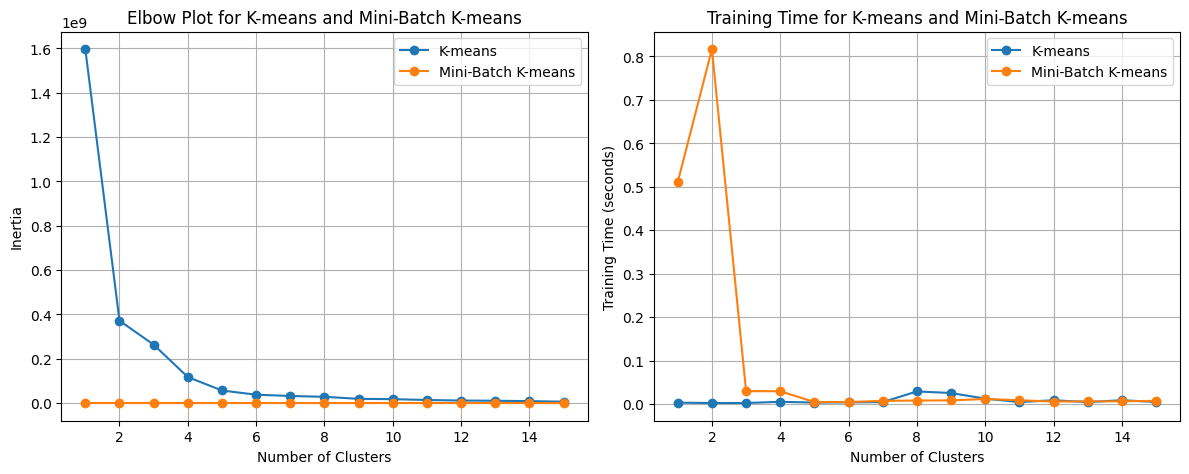

In [ ]:
create_elbow_plot(X_h1, max_clusters=15, sample_fraction=0.1)

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.61 for 4 clusters
Best score for Davies Bouldin metric: 0.55 for 6 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



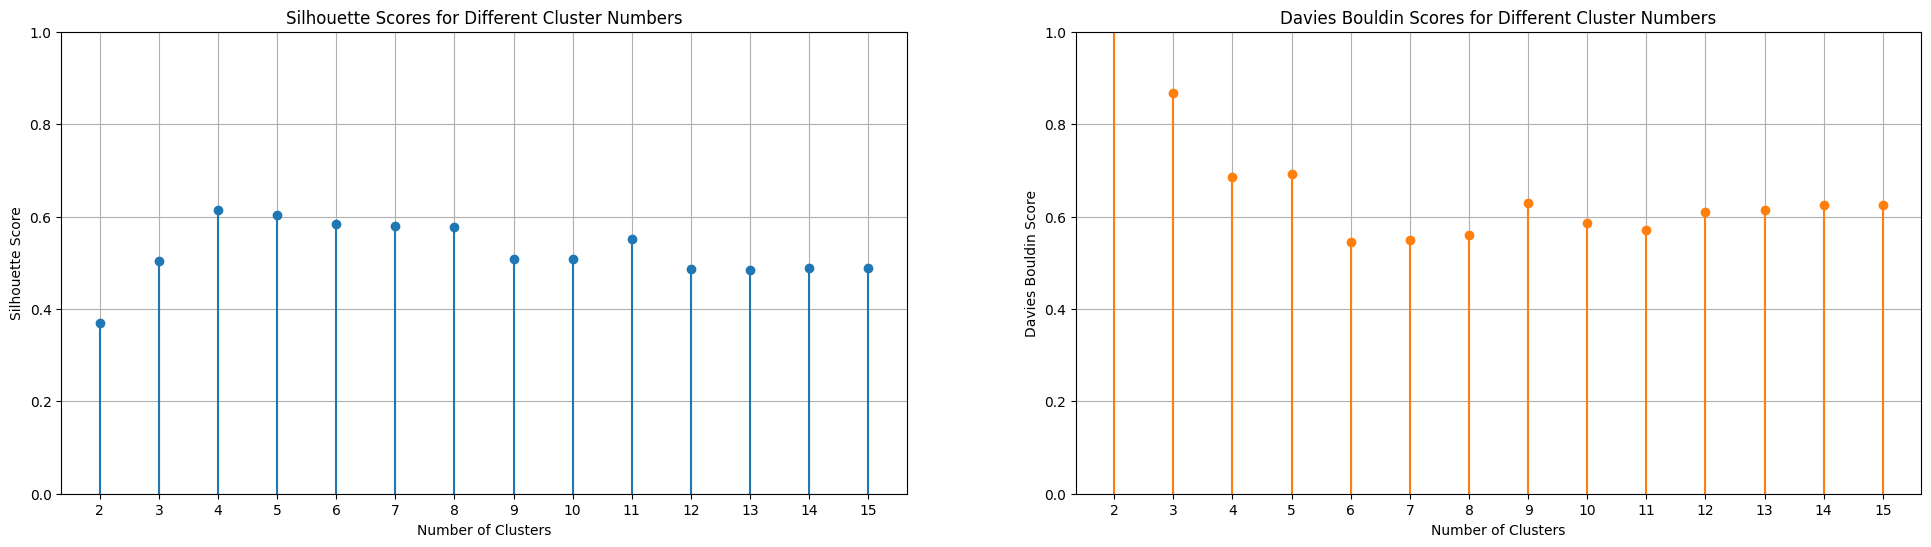

In [ ]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h1_train, X_h1_test, n_clusters, algorithm = 'k-means')

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores)

### Hospital 2

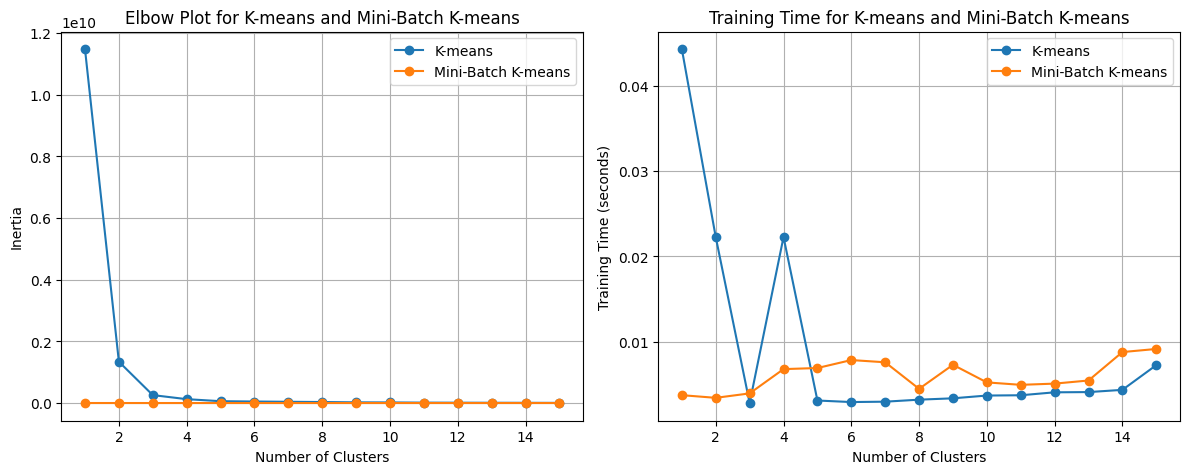

In [ ]:
create_elbow_plot(X_h2, max_clusters=15, sample_fraction=0.1)

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.90 for 2 clusters
Best score for Davies Bouldin metric: 0.20 for 2 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



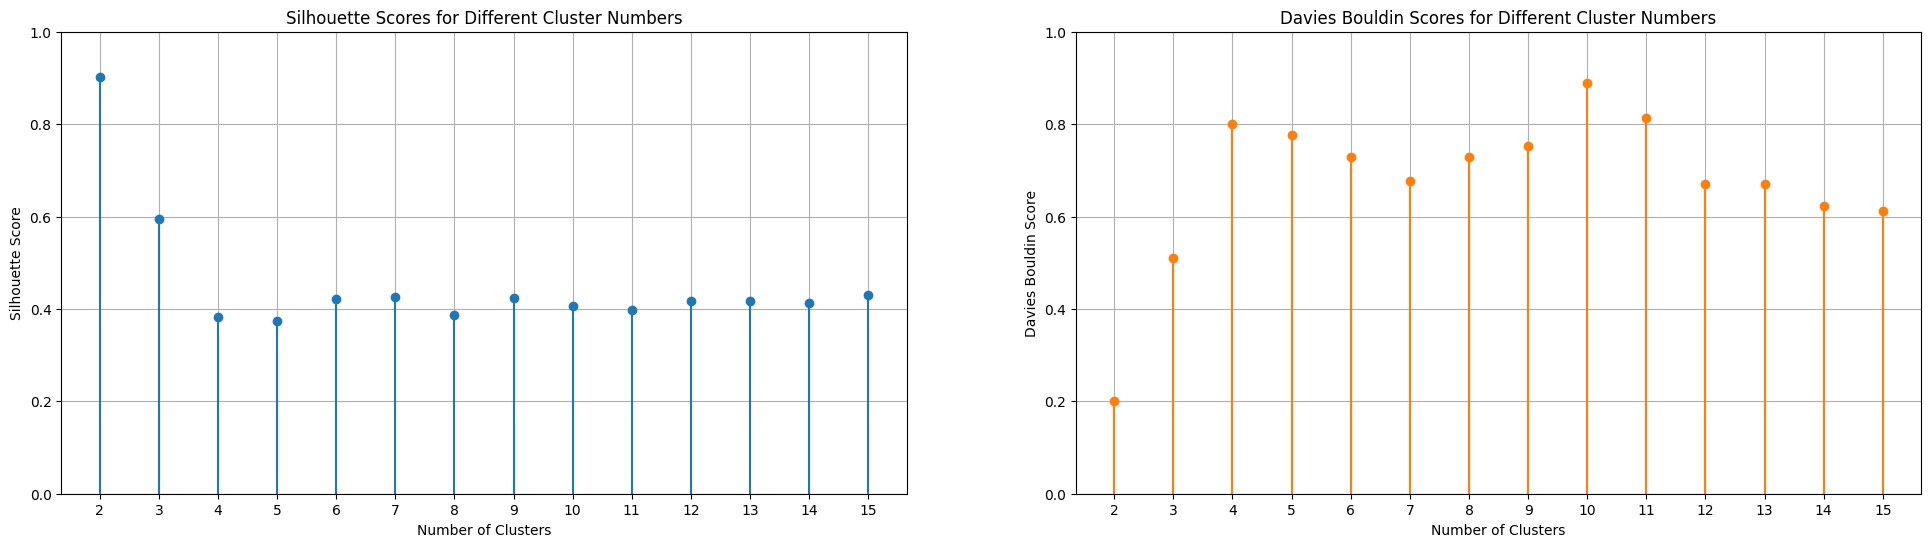

In [ ]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h2_train, X_h2_test, n_clusters, algorithm = 'k-means')

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores)

### Hospital 3

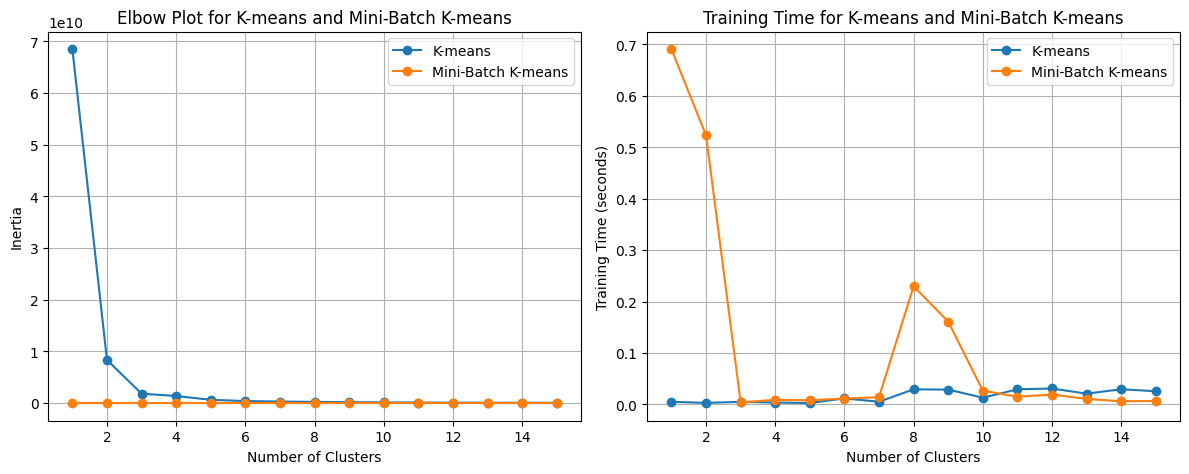

In [ ]:
create_elbow_plot(X_h3, max_clusters=15, sample_fraction=0.1)

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.72 for 2 clusters
Best score for Davies Bouldin metric: 0.41 for 2 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



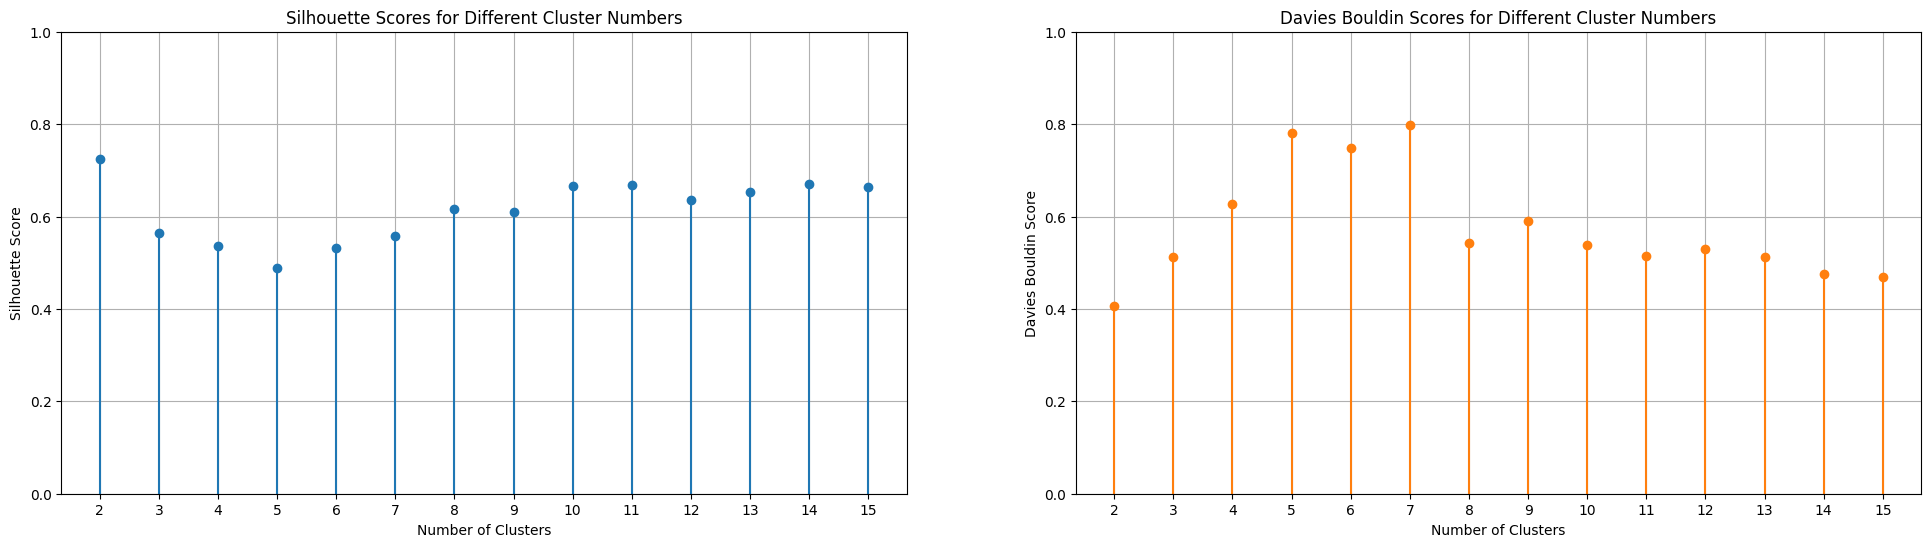

In [ ]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h3_train, X_h3_test, n_clusters, algorithm = 'k-means')

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores)

### Hospital 4

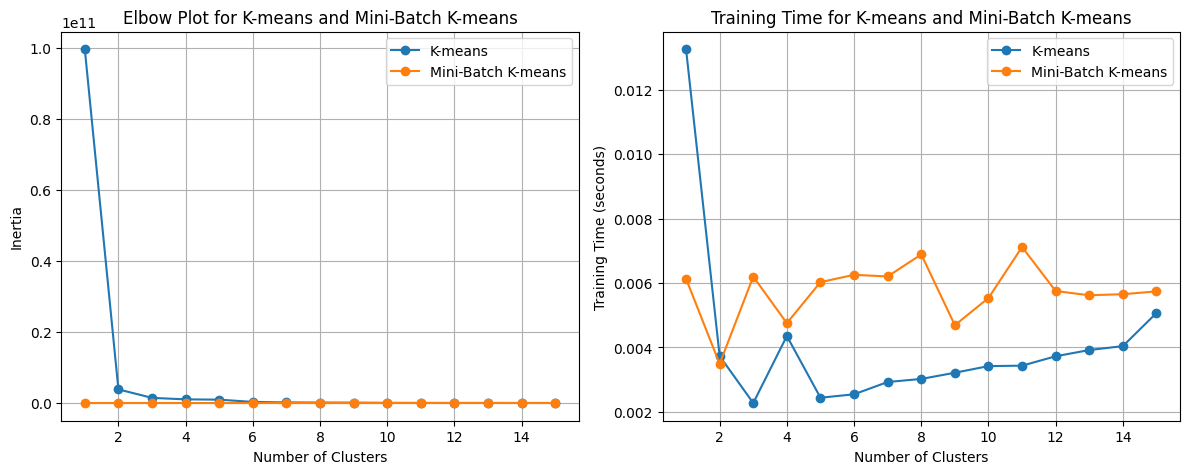

In [ ]:
create_elbow_plot(X_h4, max_clusters=15, sample_fraction=0.1)

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.91 for 2 clusters
Best score for Davies Bouldin metric: 0.19 for 2 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



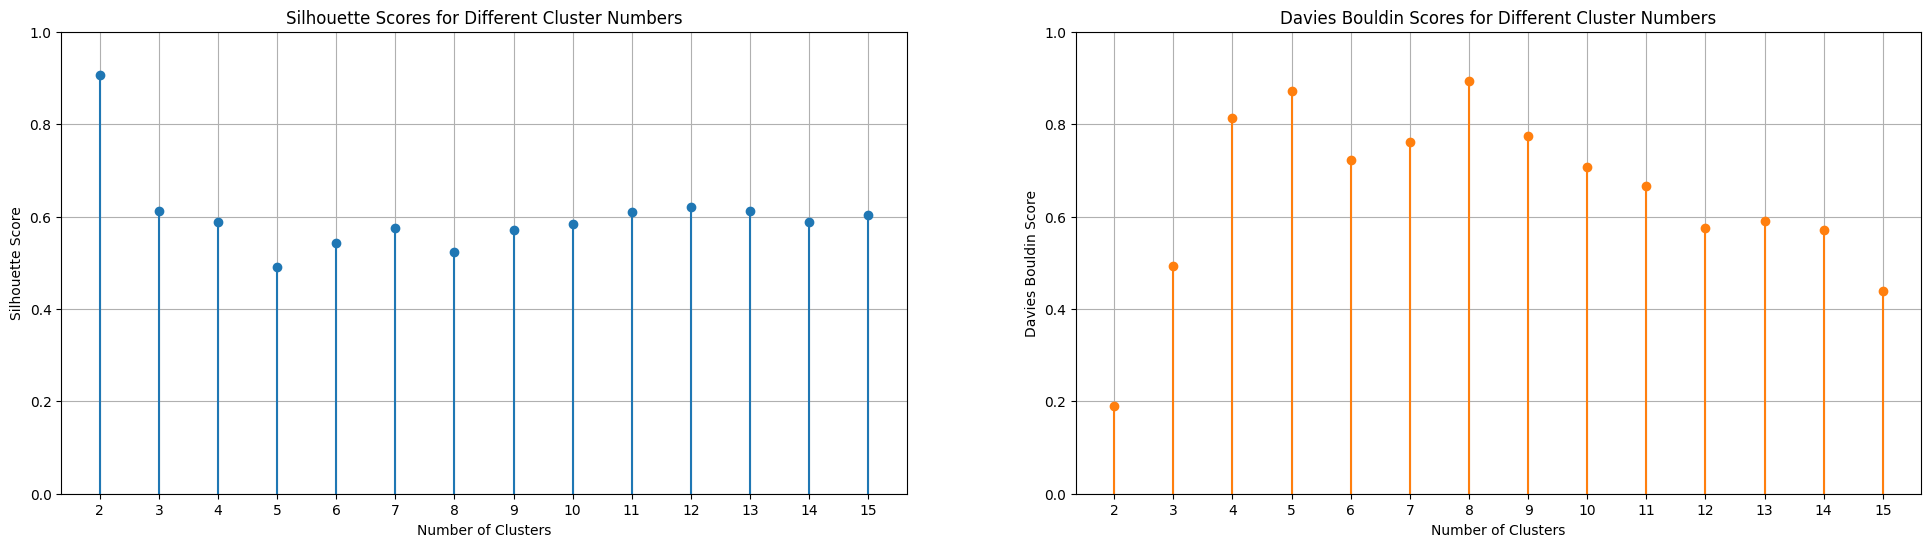

In [ ]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h4_train, X_h4_test, n_clusters, algorithm = 'k-means')

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores)

## 4.4 - Fit test

In [ ]:
from IPython.display import display

def model_validation(df, X, n_clusters = 2):

  model = MiniBatchKMeans(n_clusters=n_clusters,
                          init='k-means++',
                          n_init=1,
                          batch_size=10,
                          max_iter=10,
                          random_state=42)

  labels  = model.fit_predict(X)

  df['cluster'] = labels

  return labels

In [ ]:
import plotly.express as px

def visu_clusters(df, x1, x2, labels):
    fig = px.scatter(df, x=df[x1].astype('string'), y=df[x2], color=labels)
    fig.update_traces(marker=dict(size=5))
    fig.update_layout(
        title=f'Scatter plot of {x1} over {x2}',
        xaxis_title=x1,
        yaxis_title=x2,
        legend_title="Categories",
        xaxis_tickangle=90,
        showlegend=True
    )
    fig.show()


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

def visu_clusters_all(df1, df2, df3, df4, x1, x2, labels1, labels2, labels3, labels4):
    fig = make_subplots(rows=2, cols=2, subplot_titles=("Hospital 1", "Hospital 2", "Hospital 3", "Hospital 4"))

    # Hospital 1
    fig.add_trace(
        go.Scatter(
            x=df1[x1].astype('string'),
            y=df1[x2],
            mode='markers',
            marker=dict(color=labels1, colorscale='Rainbow', size=5),
            name='Hospital 1'
        ),
        row=1, col=1
    )

    # Hospital 2
    fig.add_trace(
        go.Scatter(
            x=df2[x1].astype('string'),
            y=df2[x2],
            mode='markers',
            marker=dict(color=labels2, colorscale='Rainbow', size=5),
            name='Hospital 2'
        ),
        row=1, col=2
    )

    # Hospital 3
    fig.add_trace(
        go.Scatter(
            x=df3[x1].astype('string'),
            y=df3[x2],
            mode='markers',
            marker=dict(color=labels3, colorscale='Rainbow', size=5),
            name='Hospital 3'
        ),
        row=2, col=1
    )

    # Hospital 4
    fig.add_trace(
        go.Scatter(
            x=df4[x1].astype('string'),
            y=df4[x2],
            mode='markers',
            marker=dict(color=labels4, colorscale='Rainbow', size=5),
            name='Hospital 4'
        ),
        row=2, col=2
    )

    fig.update_layout(
        height=1000,
        title=f"Scatter plot of {x1} over {x2} for Multiple Hospitals",
        xaxis=dict(title=x1),
        yaxis=dict(title=x2),
        showlegend=True
    )

    fig.show()


### Hospital 1

In [ ]:
labels_h1 = model_validation(df_h1.copy(),
                             X_h1,
                             n_clusters = 2)

visu_clusters(df_h1.copy(),
              'HOSPI_CODE_UCD', 'QUANTITY',
              ['cat_' + str(s) for s in labels_h1])

### Hospital 2

In [ ]:
labels_h2 = model_validation(df_h2.copy(),
                             X_h2,
                             n_clusters = 2)

visu_clusters(df_h2.copy(),
              'HOSPI_CODE_UCD', 'QUANTITY',
              ['cat_' + str(s) for s in labels_h2])

### Hospital 3

In [ ]:
labels_h3= model_validation(df_h3.copy(),
                             X_h3,
                             n_clusters = 2)

visu_clusters(df_h3.copy(),
              'HOSPI_CODE_UCD', 'QUANTITY',
              ['cat_' + str(s) for s in labels_h3])

### Hospital 4

In [ ]:
labels_h4 = model_validation(df_h4.copy(),
                             X_h4,
                             n_clusters = 2)

visu_clusters(df_h4.copy(),
              'HOSPI_CODE_UCD', 'QUANTITY',
              ['cat_' + str(s) for s in labels_h4])

### Visualizing the 4 hospitals

In [ ]:
visu_clusters_all(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(),
                  'HOSPI_CODE_UCD', 'QUANTITY',
                  labels_h1,
                  labels_h2,
                  labels_h3,
                  labels_h4)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def plot_dataframes_3d_dynamic(df_h1, df_h2, df_h3, df_h4, labels_h1, labels_h2, labels_h3, labels_h4, x='HOSPI_CODE_UCD', y='HOSPITAL', z='QUANTITY'):
    fig = make_subplots(specs=[[{'type': 'scatter3d'}]])

    x1s = df_h1[x].astype(str).values
    x2s = df_h2[x].astype(str).values
    x3s = df_h3[x].astype(str).values
    x4s = df_h4[x].astype(str).values

    y1s = np.linspace(1, 1, len(x1s))
    y2s = np.linspace(2, 2, len(x2s))
    y3s = np.linspace(3, 3, len(x3s))
    y4s = np.linspace(4, 4, len(x4s))

    z1s = df_h1[z].values
    z2s = df_h2[z].values
    z3s = df_h3[z].values
    z4s = df_h4[z].values

    fig.add_trace(
        go.Scatter3d(x=x1s, y=y1s, z=z1s, mode='markers', marker=dict(color=labels_h1, size=5, colorscale='Rainbow')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=x2s, y=y2s, z=z2s, mode='markers', marker=dict(color=labels_h2, size=5, colorscale='Rainbow')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=x3s, y=y3s, z=z3s, mode='markers', marker=dict(color=labels_h3, size=5, colorscale='Rainbow')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=x4s, y=y4s, z=z4s, mode='markers', marker=dict(color=labels_h4, size=5, colorscale='Rainbow')),
        row=1, col=1
    )

    fig.update_layout(scene=dict(xaxis_title=x, yaxis_title=y, zaxis_title=z))
    fig.update_layout(scene=dict(xaxis=dict(ticktext=x1s, tickvals=np.arange(len(x1s)), tickangle=0, tickfont=dict(size=10)),
                                 yaxis=dict(ticktext=['1', '2', '3', '4'], tickvals=[1, 2, 3, 4])),
                      margin=dict(r=200), height=800, width=1200,showlegend=True)
    fig.show()


In [ ]:
plot_dataframes_3d_dynamic(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(), labels_h1, labels_h2, labels_h3, labels_h4, z = 'QUANTITY')

### Saving the datasets with clusters

In [ ]:
df_h1['CLUSTER'] = labels_h1
df_h2['CLUSTER'] = labels_h2
df_h3['CLUSTER'] = labels_h3
df_h4['CLUSTER'] = labels_h4


df_h1.to_csv('df_h1_clustered.csv', index=False)
df_h2.to_csv('df_h2_clustered.csv', index=False)
df_h3.to_csv('df_h3_clustered.csv', index=False)
df_h4.to_csv('df_h4_clustered.csv', index=False)